In [2]:
import numpy as np
import matplotlib.pyplot as plt
import sympy as sym
from matplotlib import cm

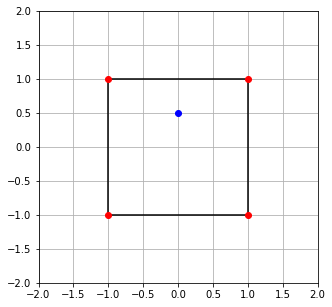

In [3]:
P_1 = (1,1)
P_2 = (-1,1)
P_3 = (-1,-1)
P_4 = (1,-1)

P = (0,0.5)

fig = plt.figure(figsize=(5,5))
ax = fig.add_subplot(1,1,1)

ax.scatter(P_1[0],P_1[1], color='r',zorder=2)
ax.scatter(P_2[0],P_2[1], color='r',zorder=2)
ax.scatter(P_3[0],P_3[1], color='r',zorder=2)
ax.scatter(P_4[0],P_4[1], color='r', zorder=2)
ax.scatter(P[0],P[1], color='blue', zorder=2)

ax.plot(P_1,P_2, color='black',zorder=1)
ax.plot(P_2,P_3, color='black',zorder=1)
ax.plot(P_3,P_4, color='black',zorder=1)
ax.plot(P_4,P_1, color='black',zorder=1)

ax.set_ylim(-2,2)
ax.set_xlim(-2,2)
ax.grid()
ax.set_axisbelow(True)

# a)

In [36]:

def Temperature(x, y, A):
    
    sum_ = 0
    
    for i in range(2):
        
        coef = 0
        
        for j in range(2):
            coef += A[i][j]*(x**i)*(y**j)
        
        sum_ += coef
        
    return sum_


In [5]:
X_ = sym.Symbol('X',Real=True)
Y_ = sym.Symbol('Y',Real=True)
A_ = sym.Symbol('a00',Real=True)
B_ = sym.Symbol('a01',Real=True)
C_ = sym.Symbol('a10',Real=True)
D_ = sym.Symbol('a11',Real=True)

M_ = [[A_,B_],[C_,D_]]

Temperature(X_,Y_,M_)

X*Y*a11 + X*a10 + Y*a01 + a00

# b)

In [37]:

position = np.zeros((4,2)) 

position[0][0], position[0][1] = 1,1 
position[1][0], position[1][1] = -1,1
position[2][0], position[2][1] = -1,-1
position[3][0], position[3][1] = 1,-1

position

array([[ 1.,  1.],
       [-1.,  1.],
       [-1., -1.],
       [ 1., -1.]])

# c)

In [38]:

Matrix = np.array([ [1,1,1,1], [1,-1,1,-1], [1,-1,-1,1], [1,1,-1,-1] ])

b = np.array([1,2,0.5,0.3])

Sol = np.linalg.solve(Matrix,b)

Coefficients = np.array( [ [Sol[0],Sol[2]],[Sol[1],Sol[3]] ] )

print(Coefficients)

[[ 0.95  0.55]
 [-0.3  -0.2 ]]


# d)

In [40]:

print(np.array([[Temperature(1,1,Coefficients)],[Temperature(-1,1,Coefficients)], \
                [Temperature(-1,-1,Coefficients)],[Temperature(1,-1,Coefficients)]]))

[[1. ]
 [2. ]
 [0.5]
 [0.3]]


# e)

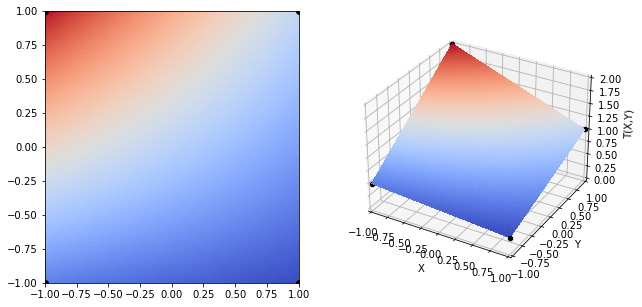

In [41]:

x = np.linspace(-1,1,100)
y = np.linspace(-1,1,100)

x, y = np.meshgrid(x, y)

T_list = Temperature(x,y,Coefficients)

fig_1 = plt.figure(figsize=(10,5))

ax1 = fig_1.add_subplot(1,2,1)
ax1.pcolor(x, y, T_list, cmap=cm.coolwarm)
ax1.set_ylim(-1,1)
ax1.set_xlim(-1,1)

ax1.scatter(P_1[0],P_1[1], color='black')
ax1.scatter(P_2[0],P_2[1], color='black')
ax1.scatter(P_3[0],P_3[1], color='black')
ax1.scatter(P_4[0],P_4[1], color='black')

ax2 = fig_1.add_subplot(1,2,2, projection='3d')
ax2.set_ylim(-1,1)
ax2.set_xlim(-1,1)
ax2.set_zlim(0,2)

ax2.set_xlabel('X')
ax2.set_ylabel('Y')
ax2.set_zlabel('T(X,Y)')


ax2.plot_surface(x,y,T_list,cmap=cm.coolwarm,linewidth=0, antialiased=False)

ax2.scatter(P_1[0],P_1[1],1, color='black')
ax2.scatter(P_2[0],P_2[1],2, color='black')
ax2.scatter(P_3[0],P_3[1],0.5, color='black')
ax2.scatter(P_4[0],P_4[1],0.3, color='black')


# f)

In [42]:

P = (0,0.5)

T_P = Temperature(P[0],P[1],Coefficients)

print(P,T_P)

(0, 0.5) 1.225


# g)

In [43]:

def GetRotatedPoints(Points,Angle):
    
    theta = Angle/180*np.pi
    
    M = np.array( [ [np.cos(theta), -np.sin(theta)],[np.sin(theta),np.cos(theta)] ] )
    
    RPoints = np.zeros((len(Points),2))
    for i in range(len(Points)):
        P = np.array(Points[i])
        RP = np.dot(M,P)

        RPoints[i] = RP
    
    return RPoints

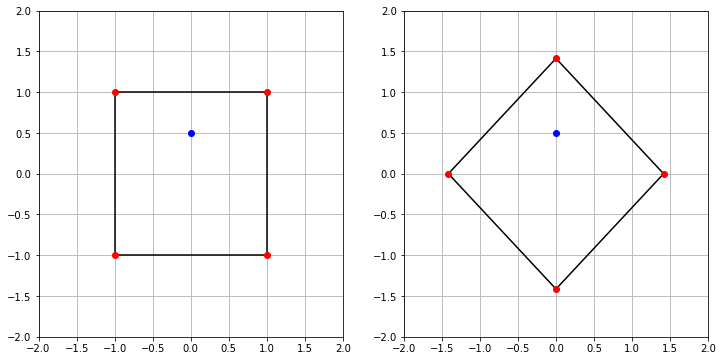

In [44]:
fig_2 = plt.figure(figsize=(12,6))
ax3 = fig_2.add_subplot(1,2,1)

ax3.scatter(P_1[0],P_1[1], color='r',zorder=2)
ax3.scatter(P_2[0],P_2[1], color='r',zorder=2)
ax3.scatter(P_3[0],P_3[1], color='r',zorder=2)
ax3.scatter(P_4[0],P_4[1], color='r', zorder=2)
ax3.scatter(P[0],P[1], color='blue', zorder=2)

ax3.plot(P_1,P_2, color='black',zorder=1)
ax3.plot(P_2,P_3, color='black',zorder=1)
ax3.plot(P_3,P_4, color='black',zorder=1)
ax3.plot(P_4,P_1, color='black',zorder=1)

ax3.set_ylim(-2,2)
ax3.set_xlim(-2,2)
ax3.grid()
ax3.set_axisbelow(True)

#Rotación de 45 grados

R_P = GetRotatedPoints(position,45)

ax4 = fig_2.add_subplot(1,2,2)

ax4.scatter(R_P[0][0],R_P[0][1], color='r',zorder=2)
ax4.scatter(R_P[1][0],R_P[1][1], color='r',zorder=2)
ax4.scatter(R_P[2][0],R_P[2][1], color='r',zorder=2)
ax4.scatter(R_P[3][0],R_P[3][1], color='r', zorder=2)
ax4.scatter(P[0],P[1], color='blue', zorder=2)

ax4.plot(R_P[1],R_P[0], color='black',zorder=1)
ax4.plot(R_P[2],R_P[1], color='black',zorder=1)
ax4.plot(R_P[3],R_P[2], color='black',zorder=1)
ax4.plot(R_P[0],R_P[3], color='black',zorder=1)

ax4.set_ylim(-2,2)
ax4.set_xlim(-2,2)
ax4.grid()
ax4.set_axisbelow(True)


# h)

In [46]:

def GetRotation(Points,b,Angle):
    
    R_Points = GetRotatedPoints(Points,Angle)
    
    Matrix = np.ones((4,4))
    
    rows = len(Matrix)
    for i in range(rows):
        Matrix[i][1] *= R_Points[i][0]
        
    for j in range(rows):
        Matrix[j][2] *= R_Points[j][1]
        
    for k in range(rows):
        Matrix[k][3] *= R_Points[k][0]*R_Points[k][1]
    
    
    if (np.linalg.det(Matrix)) == 0:
        return R_Points,None
    
    Sol = np.linalg.solve(Matrix,b)

    R_Coefficients = np.array( [ [Sol[0],Sol[2]],[Sol[1],Sol[3]] ] )
    
    return R_Points, R_Coefficients

In [47]:
#Temperatura para una rotación de 30 grados.

RP_30, RC_30 = GetRotation(position,b,30)
print(P)
Temperature(P[0],P[1],RC_30)

(0, 0.5)


1.1131569860407207

# i)

In [48]:

phi = np.linspace(0,360,10000)

R_Temp = [[],[]]

for i in range(len(phi)):
    RP_,RC_ = GetRotation(position,b,phi[i])
    
    if type(RC_) != type(None):
        temp = Temperature(P[0],P[1],RC_)
        R_Temp[0].append(temp)
        R_Temp[1].append(phi[i])
    

print(np.min(R_Temp[0]),R_Temp[1][np.argmin(R_Temp[0])])


0.6367508993422235 151.3951395139514


Para el ángulo 151.3951395139514 grados, la temperatura es mínima (0.6367508993422235 K).